# Ensemble method - Linear regression

Notebook to look at forecasts made using ensemble methods (bagging) and linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from ensemble_LR import backtest

In [ ]:
ds_begin = datetime(2021, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

## Predictions when removing the seasonality

In [5]:
error = pd.read_csv('ensemble_LR/errors_sa.csv')
print(error)

    Unnamed: 0  n_estimators  max_samples       MSE      RMSE       MAE  \
0            0            10          0.5  0.000042  0.006512  0.005572   
1            0            10          0.6  0.000376  0.019397  0.009489   
2            0            10          0.7  0.000025  0.005010  0.003931   
3            0            10          0.8  0.000020  0.004499  0.003455   
4            0            10          0.9  0.000020  0.004424  0.003531   
5            0            20          0.5  0.000132  0.011490  0.007268   
6            0            20          0.6  0.000121  0.010983  0.006666   
7            0            20          0.7  0.000021  0.004591  0.003697   
8            0            20          0.8  0.000020  0.004454  0.003566   
9            0            20          0.9  0.000019  0.004369  0.003468   
10           0            50          0.5  0.000050  0.007105  0.005343   
11           0            50          0.6  0.000049  0.007005  0.005386   
12           0           

We get the best results for n_estimator = 20 and max_sample = 0.9. Let us plot the predictions.

In [12]:
features_sa = [('sales_raw', 1),
               ('inventory_raw', 1),
               ('new_listings_raw', 1),
               ('mean_days_to_pending_raw', 1),
               ('mean_sale_to_list_ratio_raw', 2),
               ('median_days_to_pending_raw', 1),
               ('median_sale_to_list_ratio_raw', 2),
               ('newly_pending_listings_raw', 1),
               ('pct_listings_price_cut_raw', 1),
               ('pct_sold_above_list_price_raw', 2),
               ('pct_sold_below_list_price_raw', 2)]

In [13]:
(y, y_hat) = backtest(features_sa, 20, 0.9, ds_begin, ds_end, 36, True)

In [6]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


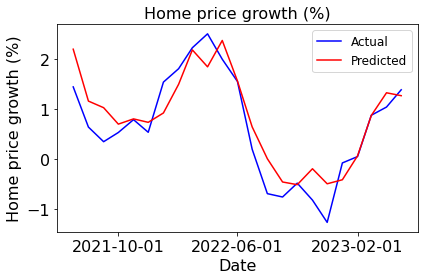

In [15]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2021, 10, 1), datetime(2022, 6, 1), datetime(2023, 2, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/ensemble_LR.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [16]:
error = pd.read_csv('ensemble_LR/errors_nsa.csv')
print(error)

    Unnamed: 0  n_estimators  max_samples       MSE      RMSE       MAE  \
0            0            10          0.5  0.005079  0.071266  0.027019   
1            0            10          0.6  0.001787  0.042273  0.020601   
2            0            10          0.7  0.000094  0.009696  0.006994   
3            0            10          0.8  0.000047  0.006890  0.005655   
4            0            10          0.9  0.000035  0.005951  0.005053   
5            0            20          0.5  0.001250  0.035357  0.019262   
6            0            20          0.6  0.000453  0.021285  0.012200   
7            0            20          0.7  0.000058  0.007638  0.006145   
8            0            20          0.8  0.000044  0.006643  0.005586   
9            0            20          0.9  0.000038  0.006142  0.005303   
10           0            50          0.5  0.001000  0.031623  0.020789   
11           0            50          0.6  0.000116  0.010771  0.007109   
12           0           

We get the best results for n_estimator = 100 and max_sample = 0.7. Let us plot the predictions.

In [23]:
features_nsa = [('sales_raw', 1),
                ('inventory_raw', 2),
                ('new_listings_raw', 5),
                ('mean_days_to_pending_raw', 1),
                ('mean_sale_to_list_ratio_raw', 2),
                ('median_days_to_pending_raw', 1),
                ('median_sale_to_list_ratio_raw', 2),
                ('newly_pending_listings_raw', 1),
                ('pct_listings_price_cut_raw', 2),
                ('pct_sold_above_list_price_raw', 2),
                ('pct_sold_below_list_price_raw', 2)]

In [24]:
(y, y_hat) = backtest(features_nsa, 100, 0.7, ds_begin, ds_end, 36, False)

In [25]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

Text(0.5, 1.0, 'Non seasonally adjusted ensemble model')

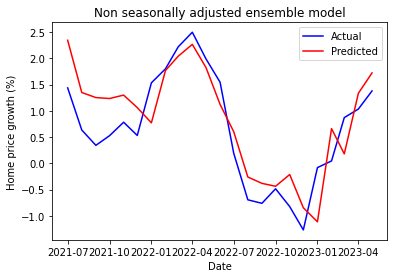

In [26]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted ensemble model')